# Inaugural Project

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
- 3. [Exercises](#toc3_)
	- 3.1 [Question 1 - Edgeworth Box](#toc3_1_) 
	- 3.2 [Question 2 - Market Clearing Error](#toc3_2_)
	- 3.3 [Question 3 - Market clearing price](#toc3_3_)
	- 3.4a [Question 4a - Allocation when p1 is in P1](#toc3_4_)
	- 3.4b [Question 4b - Allocation when p1 > 0](#toc3_5_)
	- 3.5a [Question 5a - allocation if choice set is in C](#toc3_6_)
	- 3.5b [Question 5b - Question 5b - allocation if no further restrictions](#toc3_7_)
	- 3.6a [Question 6a - Social planner](#toc3_8_)
	- 3.6b [Question 6b - Illustration of allocations](#toc3_9_)
	- 3.7 [Question 7 - Random set of 50 elements](#toc3_10_)
	- 3.8 [Question 8 - Edgeworth box for the 50 elements](#toc3_11_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc2_'></a>[Imports](#toc0_)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize_scalar
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from inauguralproject import InauguralProjectClass

## 3. <a id='toc3_'></a>[Exercises](#toc0_)

In [4]:
model = InauguralProjectClass()
par = model.par

### 3.1. <a id='toc3_1_'></a>[Question 1 - Edgeworth Box](#toc0_)

We want to illustrate the given set in an edgeworth box. To do that we have created code in our py-file. The relevant functions are *find_indifference_curve* and *plot_edgeworth_box*. We can then directly call the functions and illustrate what we want.

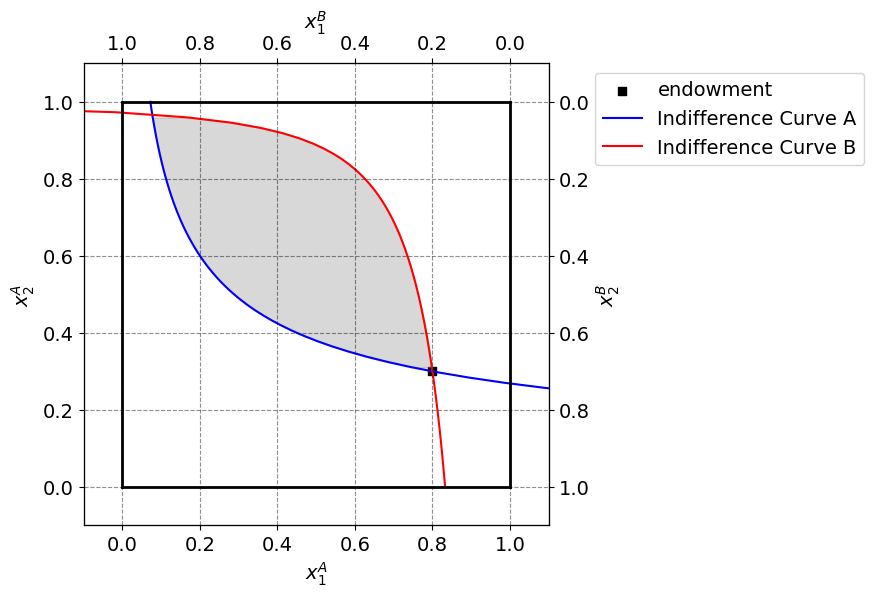

In [5]:
model.plot_edgeworth_box()

The grey shaded area in the above graph illustrates the pareto improvements relative to the given endowment. In this area we are able to make both consumers at least as good of as they are at the given endowment.

### 3.2. <a id='toc3_2_'></a>[Question 2 - Market clearing error](#toc0_)

Calculating the error in the market clearing condition for p1 in the set P1. 
First we define the range P1 and set N=75 after which we call a function, which we have defined in the py-file, that calculates the market errors. It does so by iterating over each p1 value in P1. We do that now:

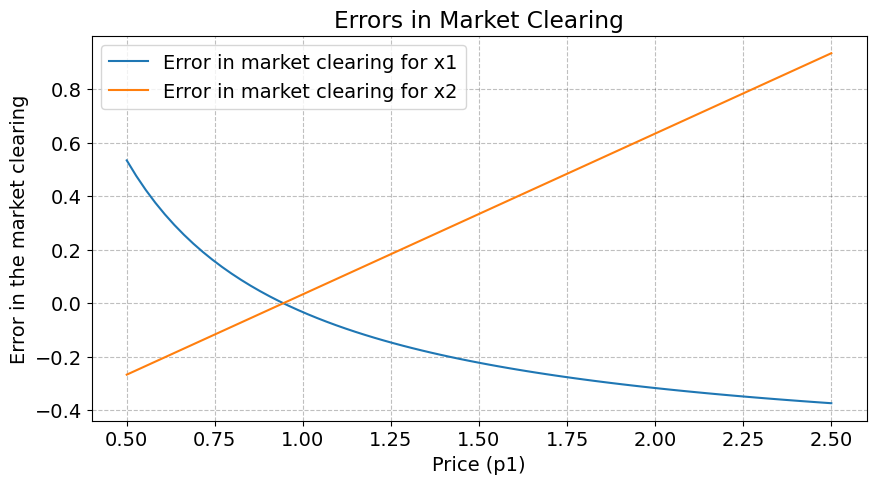

In [6]:
# Calculate P1
P1 = np.linspace(0.5, 2.5, num=75)

# Calculate errors using the new method
error_1, error_2 = model.calculate_market_clearing_errors(P1)

# Plotting errors
plt.figure(figsize=(10, 5))
plt.plot(P1, error_1, label='Error in market clearing for x1')
plt.plot(P1, error_2, label='Error in market clearing for x2')
plt.xlabel('Price (p1)')
plt.ylabel('Error in the market clearing')
plt.title('Errors in Market Clearing')
plt.grid(True)
plt.legend()
# Show plot
plt.show()

The figure shows, that the market clearing price is somewhere around p1=0.9, as it is where both errors are closest to zero. In Q3 we calculate the market clearing price.

### 3.3. <a id='toc3_3_'></a>[Question 3 - Market clearing price](#toc0_)

To find the market clearing price, we iterate over all possible values for p1 in P1. We now find the smallest error in the list. The corresponding p1-value to the smallest error will also be the market clearing price. We thus have:

In [7]:
# Defining the set P1
P1 = np.linspace(0.5, 2.5, num=75)

In [8]:
# Find the exact market clearing price using P1
market_clearing_price, min_error = model.market_clearing_price(P1)

print(f"Market clearing price: {market_clearing_price:.3f}")
print(f"Minimum error: {min_error:.3f}")

Market clearing price: 0.944
Minimum error: 0.000


With the epsilon values (minimum error) being 0, we know that the price is right.

### 3.4a. <a id='toc3_4_'></a>[Question 4a - Allocation when p1 is in P1](#toc0_)

We have calculated new utility functions in the py-file, as well as the allocation of goods. Therefore we can just call the functions here, and print the values.

In [15]:
# Find the allocation maximizing consumer A's utility
max_utility_price, allocation_A, allocation_B, max_utility = model.max_utility_A_allocation(P1)

print(f"Price maximizing consumer A's utility: {max_utility_price:.3f}")
print(f"Allocation consumer A: {allocation_A}")
print(f"Allocation consumer B: {allocation_B}")
print(f"Maximum utility for consumer A: {max_utility:.3f}")

Price maximizing consumer A's utility: 1.899
Allocation consumer A: (0.6209680844926924, 0.6400435871363097)
Allocation consumer B: (0.37903191550730764, 0.35995641286369034)
Maximum utility for consumer A: 0.634


We observe that the allocation of each good sums to 1 and the calculation must be right.

### 3.4b. <a id='toc3_5_'></a>[Question 4b - Allocation when p1 > 0](#toc0_)

We replicate the process above to find the equilibrium when p1 can take any positive values. Only thing different is that we redefine the set P1 that p1 must fit within. After this the process is pretty much repeated.

In [10]:
# Define the set P1_4b where p1>0
N = 75
P1_4b = [1*10**-8 + 2 * i / N for i in range(N + 1)] # 1*10**-8 is added to avoid division by zero.

In [11]:
max_utility_price, allocation_A, allocation_B, max_utility = model.max_utility_A_allocation(P1_4b)

print(f"Price maximizing consumer A's utility: {max_utility_price:.3f}")
print(f"Allocation consumer A: {allocation_A}")
print(f"Allocation consumer B: {allocation_B}")
print(f"Maximum utility for consumer A: {max_utility:.3f}")

Price maximizing consumer A's utility: 1.899
Allocation consumer A: (0.6209682330137474, 0.6400435105945382)
Allocation consumer B: (0.37903176698625257, 0.35995648940546177)
Maximum utility for consumer A: 0.634


We observe the result to be identical.

### 3.5a. <a id='toc3_6_'></a>[Question 5a - allocation if choice set is in C](#toc0_)

We use the function in the py-file: allocation_within_choise_set to calculate the allocations if the choice set is in C and when A is the market maker. We then print the results.

In [12]:
optimal_allocation_A_5a, optimal_allocation_B_5a, max_utility_A_5a = model.allocation_within_choice_set()
print("Optimal Allocation for A:", optimal_allocation_A_5a)
print("Optimal Allocation for B:", optimal_allocation_B_5a)
print("Maximum Utility for A:", max_utility_A_5a)

Optimal Allocation for A: (0.56, 0.8533333333333334)
Optimal Allocation for B: (0.43999999999999995, 0.1466666666666666)
Maximum Utility for A: 0.7415523509091093


### 3.5b. <a id='toc3_7_'></b>[Question 5b - allocation if no further restrictions](#toc0_)

We repeat the procedure but only change the constraint conditions. The calculations can be found in the py-file function: allocation_without_restrictions. We then print the results.

In [13]:
optimal_allocation_A, optimal_allocation_B, max_utility_A = model.allocation_without_restrictions()
print("Optimal Allocation for A:", optimal_allocation_A)
print("Optimal Allocation for B:", optimal_allocation_B)
print("Maximum Utility for A:", max_utility_A)

Optimal Allocation for A: [0.68087076 0.72506828]
Optimal Allocation for B: (0.3191292365186671, 0.27493171736634314)
Maximum Utility for A: 0.7100258610697728


We find the allocation to be somewhat close to the previous allocation, but not identical. This is due to the fact, that the restrictions are not as tough as before, hence B receives more of good 2.

### 3.6a. <a id='toc3_8_'></a>[Question 6a - Social planner](#toc0_)

We use the function in the py-file: utilitarian_allocation to calculate the allocation of goods when the social planner is the market maker. We then print the results.

In [14]:
optimal_allocation_A, optimal_allocation_B, max_utility_aggregate = model.utilitarian_allocation()
print("Optimal Allocation for A:", optimal_allocation_A)
print("Optimal Allocation for B:", optimal_allocation_B)
print("Maximum Aggregate Utility:", max_utility_aggregate)

Optimal Allocation for A: [0.33333337 0.66666663]
Optimal Allocation for B: (0.6666666340306149, 0.3333333739359233)
Maximum Aggregate Utility: 1.0582673679787966


The allocation now corresponds to the alpha and beta values, which makes sence. The social planner will always try to maximize the aggregate utility.

### 3.6b. <a id='toc3_9_'></a>[Question 6b - Illustration of allocations](#toc0_)

### GAMMEL KODE

In [ ]:
# Plot allocations
plt.figure(figsize=(8, 6))

# Plot allocation obtained from social planner utility maximization
plt.plot(x1A_4a, x1B_4a, 'gs', label='4a')
plt.plot(x1A_4b, x1B_4b, 'ro', label='4b')
plt.plot(optimal_allocation[0], optimal_allocation[1], 'b^', label='5a and 5b')
plt.plot(optimal_x1A, optimal_x2A, 'y*', label='Social Planner Utility Maximization, 6a and 6b')

# Add labels and legend
plt.xlabel('Quantity of Good 1')
plt.ylabel('Quantity of Good 2')
plt.title('Allocations')
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])

# Show plot
plt.grid(True)
plt.show()

We observe that all the points are laying within the oval explained in assignment 1, which means that all the points satisfy are either pareto improvements relative to the initial endowment or status quo from a Pareto efficient perspective.  
We furthermore observe the social optimal planner solution to be the most equal seen from a distributive perspective. It is the exact opposite with the solution from 5a and 5b. The solutions from 4a and 4b on the other hand are very close to the social planner solution because it is not only consumer A that decides the allocation, opposite to in assignment 5.

### 3.7. <a id='toc3_10_'></a>[Question 7 - Random set of 50 elements](#toc0_)

We consider the set and draw 50 random points from the seed number 123. We display the numbers in a plot.

In [ ]:
# Set the seed for reproducibility
np.random.seed(123)

# Number of elements in the set
num_elements = 50

# Generate random elements for set W
W = np.random.rand(num_elements, 2)

# Plot set W
plt.figure(figsize=(8, 6))
plt.plot(W[:, 0], W[:, 1], 'bo', label='Elements of set W')
plt.xlabel('w1A')
plt.ylabel('w2A')
plt.title('Set W with 50 Elements')
plt.grid(True)
plt.legend()
plt.show()

### 3.8. <a id='toc3_11_'></a>[Question 8 - PLotting allocation in an Edgeworth Box](#toc0_)

To find the market equilibrium allocation for each $\omega^A\in W$ we create to empty lists for the two coordinates and iterate over the set of $\omega^A$. While iterating over the set we reuse the code for market equilibria from earlier.

In [ ]:
# Create lists to store market equilibrium allocations
x1A_list = []
x2A_list = []

# Iterate over different values of par.w1a and par.w2a
for w1a, w2a in W:
    # Set endowment levels for agent A
    model.par.w1A = w1a
    model.par.w2A = w2a

    # Define the range of prices
    N = 75
    P1 = [1 * 10**-8 + 2 * i / N for i in range(N + 1)]  # 1*10**-8 is added to avoid division by zero

    # Calculate market clearing errors
    errors = model.calculate_market_clearing_errors(P1)

    # Find market clearing price
    market_clearing_price, min_error = model.find_market_clearing_price(P1)
    x1A_market_eq = model.demand_A(market_clearing_price)
    x1B_market_eq = model.demand_B(market_clearing_price)

    # Append the market equilibrium allocation to lists
    x1A_list.append(x1A_market_eq)
    x2A_list.append(x1B_market_eq)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x1A_list, x2A_list, label='Agent A', color='blue')
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()

We note that all the market equilibrium allocation are located along the budget line, also depicted in the graph from question 1. 

### 4. <a id='toc3_11_'></a>[Sources](#toc0_)

We have generally found help and inspiration from ChatGPT and general desktop research for most of the questions. Furthermore, the following source has been used for question 1 as also noted there:  
  author = Maxim Litvak  
  title = pyEdgeworthBox: A Python Library for Edgeworth Box Plots  
  year = 2024 (Year of the version or first release)  
  version = 0.3.3  
  url = https://github.com/maxlit/pyEdgeworthBox  